<a href="https://colab.research.google.com/github/Gokul079/Project/blob/main/Delhi_Air_Quality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**1.Read csv**

In [5]:
df=pd.read_csv('Delhi Air Quality.csv')
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


**2.Remove Duplicates**

In [6]:
df.isnull().sum()
df.duplicated().sum()
df = df.drop_duplicates()
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


**3.Handle Outliers**

In [7]:
Q1 = df['pm2_5'].quantile(0.25)
Q3 = df['pm2_5'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['pm2_5'] >= Q1 - 1.5*IQR) & (df['pm2_5'] <= Q3 + 1.5*IQR)]
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


**4.Add New Columns**

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['hour'] = df['date'].dt.hour
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,hour
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,November,1
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,November,2
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020,November,3
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020,November,4
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020,November,5
...,...,...,...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,2023,January,4
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,2023,January,5
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,2023,January,6
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,2023,January,7


**5.Time Series Analysis**

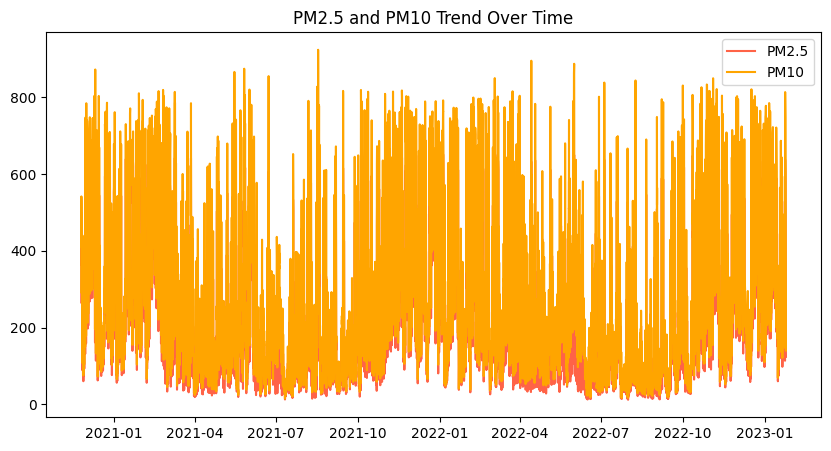

In [9]:

plt.figure(figsize=(10,5))
plt.plot(df['date'], df['pm2_5'], color='tomato', label='PM2.5')
plt.plot(df['date'], df['pm10'], color='orange', label='PM10')
plt.legend()
plt.title("PM2.5 and PM10 Trend Over Time")
plt.show()

**6.Monthly Average Pollutant Levels**

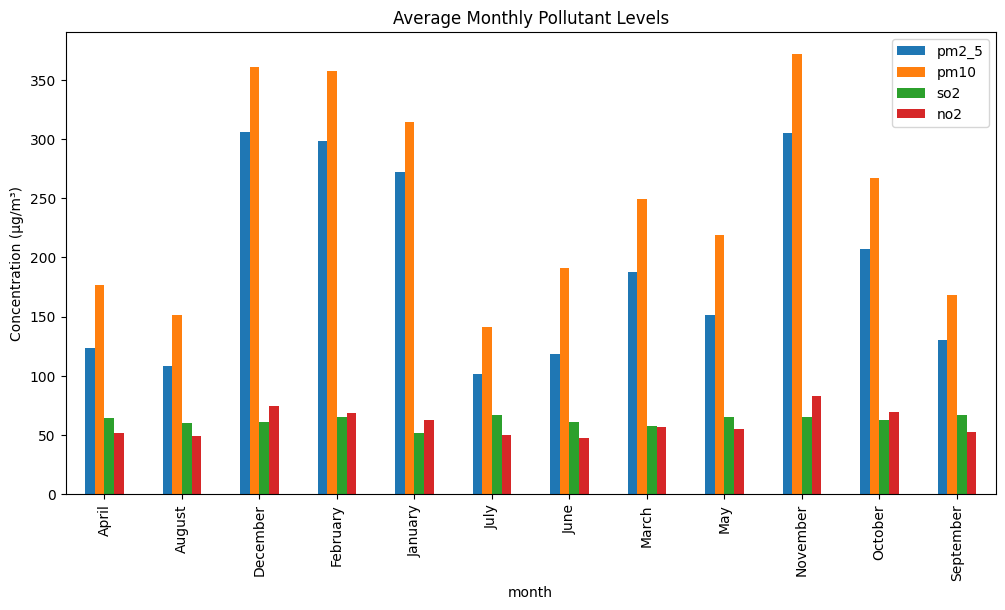

In [10]:
monthly_avg = df.groupby('month')[['pm2_5','pm10','so2','no2']].mean().sort_index()
monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title("Average Monthly Pollutant Levels")
plt.ylabel("Concentration (µg/m³)")
plt.show()

**7.Distribution of Pollutants**

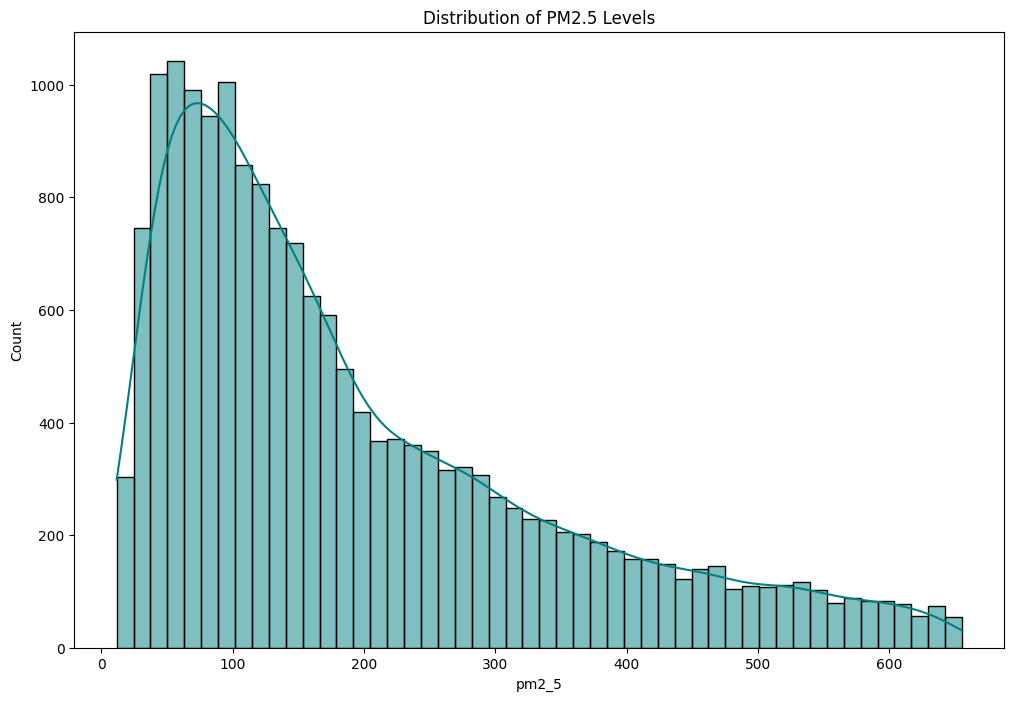

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(df['pm2_5'], kde=True, bins=50, color='teal')
plt.title("Distribution of PM2.5 Levels")
plt.show()


**8.Hourly Variation**

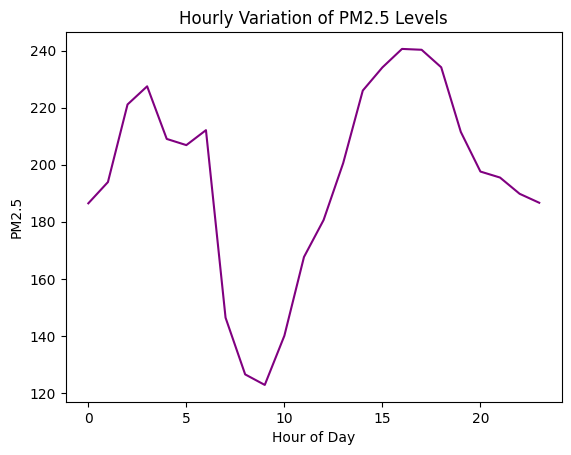

In [12]:
hourly_avg = df.groupby('hour')['pm2_5'].mean()
plt.plot(hourly_avg.index, hourly_avg.values, color='purple')
plt.title("Hourly Variation of PM2.5 Levels")
plt.xlabel("Hour of Day")
plt.ylabel("PM2.5")
plt.show()

**9.Pair Plot**

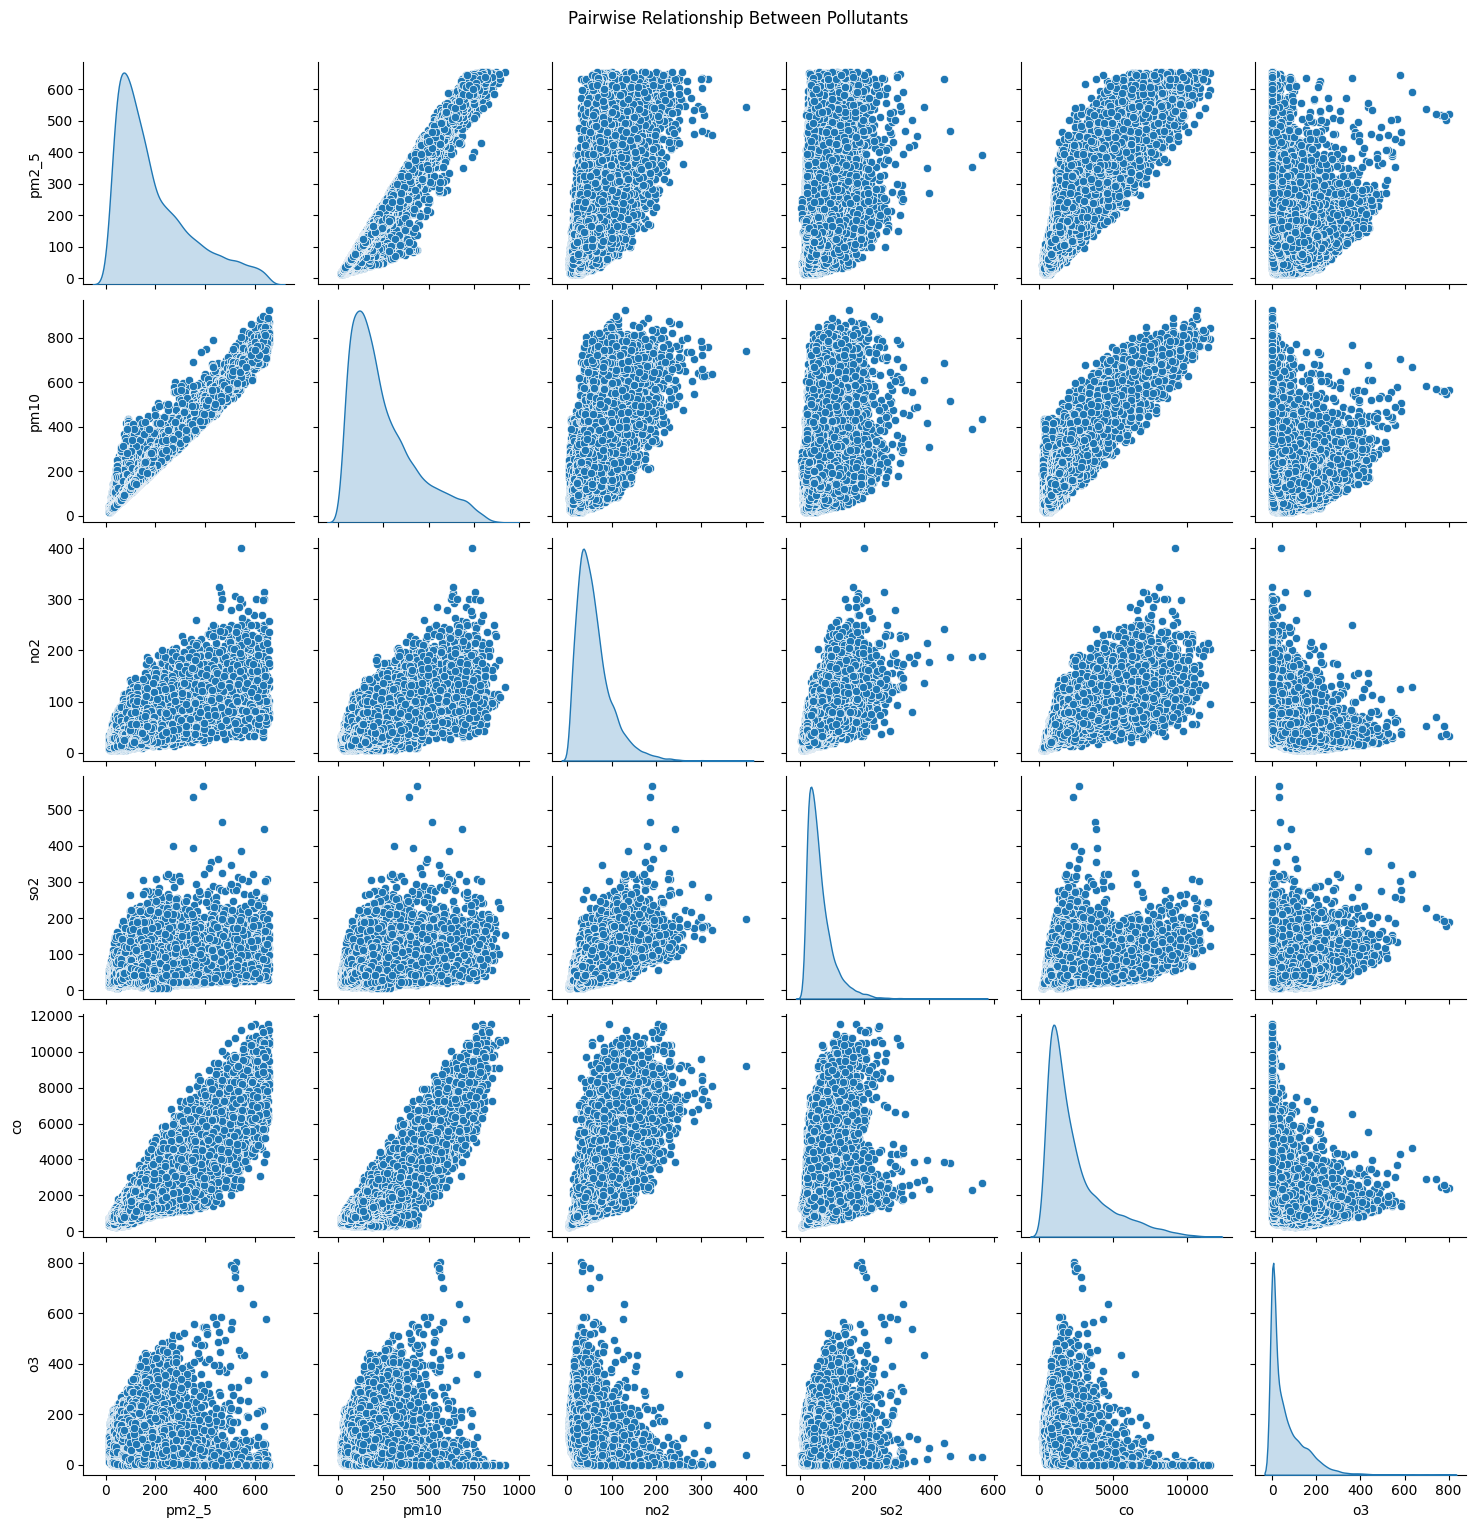

In [13]:
sns.pairplot(df[['pm2_5','pm10','no2','so2','co','o3']], diag_kind='kde')
plt.suptitle("Pairwise Relationship Between Pollutants", y=1.02)
plt.show()

**10.Pie Chart**

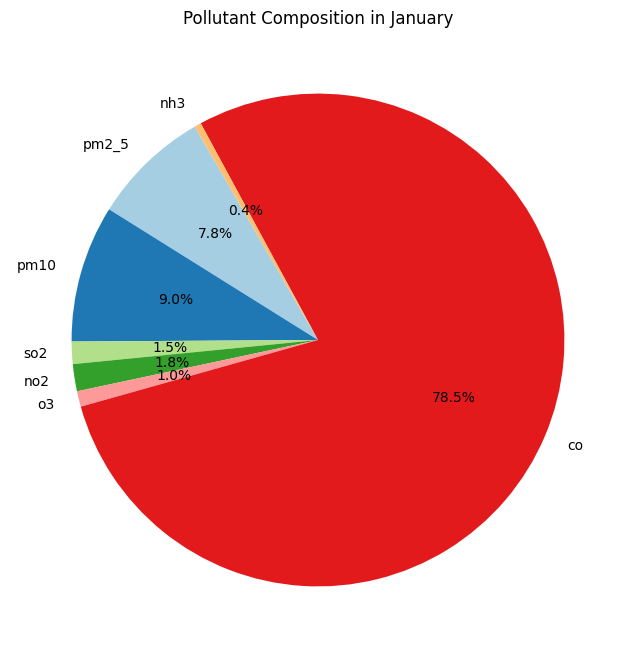

In [14]:
jan_data = df[df['month'] == 'January'][['pm2_5','pm10','so2','no2','o3','co','nh3']].mean()

plt.figure(figsize=(8,8))
plt.pie(jan_data, labels=jan_data.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette('Paired'))
plt.title("Pollutant Composition in January")
plt.show()

**11.Seasonal Pollution Trend**

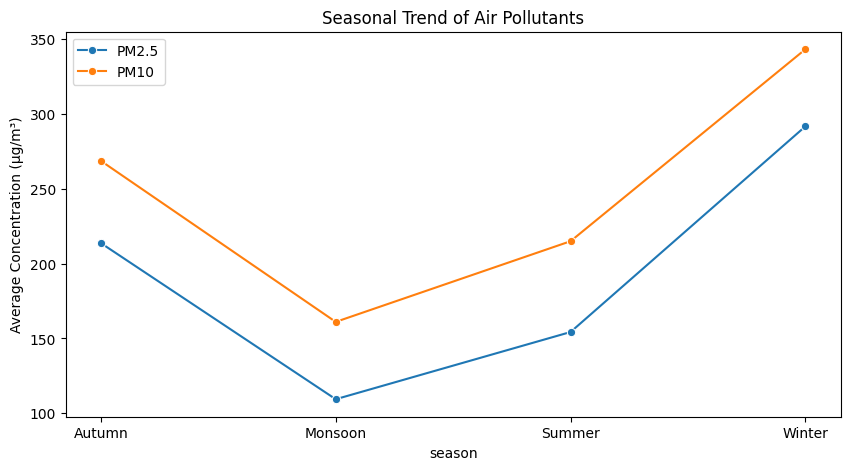

In [15]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Autumn'

df['season'] = df['date'].dt.month.map(get_season)

seasonal_avg = df.groupby('season')[['pm2_5','pm10']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='season', y='pm2_5', data=seasonal_avg, marker='o', label='PM2.5')
sns.lineplot(x='season', y='pm10', data=seasonal_avg, marker='o', label='PM10')
plt.title("Seasonal Trend of Air Pollutants")
plt.ylabel("Average Concentration (µg/m³)")
plt.legend()
plt.show()

**12.Download Cleaned Dataset**

In [16]:
df.to_excel('Cleaned Delhi Air Quality.xlsx')